In [2]:
%matplotlib notebook
import rebound
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
sim = rebound.Simulation.from_file("checkpoint.bin")
sim.status()

---------------------------------
REBOUND version:     	3.8.0
REBOUND built on:    	Feb 16 2019 13:25:19
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.0010377821915567387 y=0.007493321292031362 z=-5.012610063327123e-05 vx=-0.002937902617112376 vy=0.0006056110662132348 vz=7.578703369622471e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=0.3443668457327731 y=-0.17067080513666635 z=-0.0462951133296615 vx=2.6968801249944008 vy=9.601036132615253 vz=0.5368849879358131>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.6879796788647574 y=-0.20944951066386214 z=0.03661495770819082 vx=2.172777546712054 vy=-7.077368730280796 vz=-0.22259841261107977>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.7113045602813076 y=0.6912559280347028 z=-7.911325877229079e-05 vx=-4.4635291727530735 vy=-4.550103270674196 vz=0.00029524036603

/home/jules/.local/lib/python3.6/site-packages/rebound/simulation.py:375: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/jules/.local/lib/python3.6/site-packages/rebound/simulation.py:375: RuntimeWarning: Encountered unkown field in file. File might have been saved with a different version of REBOUND.
  warnings.warn(message, RuntimeWarning)


In [4]:
def rotate(theta, index):
    x_ = sim.particles[index].x * np.cos(theta) - sim.particles[index].y* np.sin(theta)
    y_ = sim.particles[index].x * np.sin(theta) + sim.particles[index].y* np.cos(theta)
    return x_ , y_
    
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))


sim.t = 0
sim.move_to_com()
Noutputs = 4000
years = 100.
#position in co-rotating frame
sun_pos = np.zeros((Noutputs,2))
earth_pos = np.zeros((Noutputs,2))
cruithne_pos = np.zeros((Noutputs,2))
times = np.zeros(Noutputs)
i = 0


x_earth = sim.particles[3].x
y_earth = sim.particles[3].y
z_earth = sim.particles[3].z
pos = (sim.particles[3].x, sim.particles[3].y)
theta = 0
for time in np.linspace(0,years,Noutputs):
    #print(time)
    
    sim.integrate(time)
    new_x_earth = sim.particles[3].x
    new_y_earth = sim.particles[3].y
    new_z_earth = sim.particles[3].z
    new_pos = (sim.particles[3].x, sim.particles[3].y)
    
    #theta = 2*np.arcsin( (np.sqrt((new_x_earth-x_earth)**2 + (new_y_earth-y_earth)**2)/2 ) \
                        #/np.sqrt(new_x_earth**2 + new_y_earth**2))    
        
    theta -= angle_between(pos,new_pos)    
    print(theta)
    angle = theta % (2*np.pi)
    earth_pos[i] = rotate(angle, 3)
    sun_pos[i] =  rotate(angle, 0)
    cruithne_pos[i] = rotate(angle, 5)
    
    x_earth = new_x_earth
    y_earth = new_y_earth
    z_earth = new_z_earth
    pos = new_pos
    #energy_deltas[i] = sim.calculate_energy()- energy_0
    times[i] = time
    i += 1
#print(sun_pos)
#print(earth_pos)
#print(cruithne_pos)


0.0
-0.16049724030278772
-0.3205467974242215
-0.48007537660758787
-0.6390245002910194
-0.7973517636885815
-0.9550315474140063
-1.1120552085340596
-1.2684308004314893
-1.424182375571818
-1.579348934657801
-1.733983090187698
-1.8881495090028566
-2.0419231908153903
-2.1953876300153765
-2.348632897718356
-2.5017536701282204
-2.65484722065701
-2.8080113886125253
-2.9613425344536775
-3.1149334913438254
-3.2688715336582446
-3.4232363892485753
-3.578098321046945
-3.7335163137006404
-3.889536412398679
-4.046190269148222
-4.20349395751619
-4.361447120468814
-4.520032515682273
-4.679216017194967
-4.838947120968691
-4.99915998025191
-5.159774971119428
-5.320700772498628
-5.481836900818152
-5.643076611485867
-5.804310057399185
-5.965427574961786
-6.126322958579262
-6.28689658582663
-6.447058267092601
-6.606729714615169
-6.765846553511408
-6.924359821205812
-7.082236934521015
-7.2394621416127105
-7.3960364869297806
-7.551977335362508
-7.707317515439085
-7.862104147068659
-8.01639722175459
-8.1702680

-134.48590888440054
-134.63754986810724
-134.78916029939
-134.94086588344274
-135.09278995742784
-135.24505123537716
-135.39776157023232
-135.55102373466957
-135.70492923240997
-135.85955616445867
-136.0149671904375
-136.17120764238567
-136.32830386567878
-136.4862618759769
-136.64506642618232
-136.8046805894924
-136.96504595864556
-137.12608353318123
-137.28769534398802
-137.44976682392917
-137.6121698835633
-137.77476659831208
-137.9374133632742
-138.0999653309364
-138.2622809221809
-138.42422619297443
-138.58567884797057
-138.74653174061226
-138.9066957283033
-139.06610174109227
-139.22470194872113
-139.38247012996112
-139.53940148002735
-139.6955119190592
-139.85083690539864
-140.00542983225947
-140.1593601165186
-140.3127110780805
-140.46557768852045
-140.61806424822305
-140.77028204136644
-140.92234700167026
-141.07437740180322
-141.22649157144104
-141.37880564464817
-141.5314313359882
-141.68447374712187
-141.838029210626
-141.99218318646945
-142.1470082384108
-142.3025621314851

-200.3012481595804
-200.4640332597723
-200.62688324149437
-200.7896485719732
-200.95218244925937
-201.1143453556623
-201.27600926681086
-201.4370613257187
-201.59740683526942
-201.7569714764503
-201.91570271766278
-202.07357043514799
-202.23056680505746
-202.38670555829287
-202.54202071872285
-202.69656494350312
-202.8504075727941
-203.00363248581695
-203.15633584263975
-203.30862377114914
-203.4606100400349
-203.61241374282477
-203.7641570042586
-203.91596270999767
-204.06795225516572
-204.2202433052407
-204.37294756223488
-204.5261685366851
-204.67999934298507
-204.83452054022507
-204.98979805281814
-205.14588122647234
-205.3028010922583
-205.46056892532334
-205.6191751952226
-205.77858900904414
-205.93875814386422
-206.09960975014778
-206.26105177916412
-206.4229751438197
-206.58525658902667
-206.74776218903696
-206.91035133516613
-207.07288104149362
-207.23521036716323
-207.39720474296914
-207.55873999847205
-207.71970591226184
-207.88000914858222
-208.03957549283297
-208.198351344

-266.90847949673787
-267.0601658374453
-267.2123881833543
-267.36526176096856
-267.51888979075414
-267.6733609799318
-267.8287470390638
-267.985100294192
-268.1424514894594
-268.30080790018496
-268.46015190691287
-268.6204401795209
-268.78160361854077
-268.94354818682046
-269.10615672775316
-269.26929181276773
-269.43279957493763
-269.5965143299085
-269.7602636708076
-269.9238738922088
-270.0871756455479
-270.2500094616476
-270.41223074436095
-270.57371396690905
-270.7343559151803
-270.8940779069441
-271.05282699223653
-271.2105762062959
-271.36732399504655
-271.52309296190157
-271.67792809467096
-271.8318946244838
-271.9850756485504
-272.1375696223531
-272.2894878080189
-272.44095173965945
-272.59209073485357
-272.74303946306486
-272.8939355677671
-273.04491732793764
-273.19612133892406
-273.34768019113324
-273.4997201271783
-273.6523586654534
-273.8057021902709
-273.95984352503444
-274.1148595223347
-274.2708087270488
-274.42772920349097
-274.58563663244223
-274.74452280118686
-274.9

-336.96425387167596
-337.1206031620014
-337.2778503144416
-337.4360028280675
-337.5950457919811
-337.75494125215505
-337.9156282389218
-338.07702355499754
-338.23902340031333
-338.40150584843053
-338.5643341353101
-338.7273606577252
-338.890431514407
-339.0533913717323
-339.21608840542433
-339.37837906585486
-339.540132438671
-339.7012340147207
-339.8615887055984
-340.0211229428752
-340.17978580296955
-340.3375493494627
-340.49440838674104
-340.6503796487136
-340.80550046903477
-340.9598270470999
-341.11343243185866
-341.2664043273163
-341.41884280067046
-341.57085795139136
-341.7225675791417
-341.87409486871366
-342.02556609845755
-342.1771083753106
-342.3288473873506
-342.4809051594663
-342.6333978023917
-342.7864332525588
-342.9401090103196
-343.0945098966072
-343.2497058639765
-343.4057499163908
-343.5626762114713
-343.72049843734527
-343.8792085673365
-344.0387761034933
-344.199147930311
-344.36024887397974
-344.5219830378933
-344.6842359497243
-344.8468775035027
-345.009765622138

-469.57704559098744
-469.73763470680956
-469.89891127296596
-470.0607744584395
-470.22310578781656
-470.38577239357056
-470.5486308374302
-470.7115312921906
-470.8743220887081
-471.0368545147564
-471.19898751528945
-471.3605919904189
-471.5215544943461
-471.68178021659605
-471.8411951691218
-471.99974755639414
-472.157408360064
-472.3141712098768
-472.47005163969413
-472.625085841318
-472.7793290309571
-472.9328535361274
-473.085746696011
-473.238108648985
-473.39005005883297
-473.54168981402887
-473.69315272526444
-473.84456722702174
-473.9960630751927
-474.14776902932016
-474.2998105068251
-474.4523071997077
-474.6053706514929
-474.75910180311655
-474.9135885323282
-475.06890323131034
-475.2251004902085
-475.3822149765659
-475.5402596175597
-475.69922421665746
-475.85907464056396
-476.01975269587626
-476.1811768010114
-476.34324352448857
-476.5058300119698
-476.6687972664192
-476.8319941821093
-476.9952621707076
-477.1584401652752
-477.3213697504798
-477.48390014845523
-477.645892817

-537.1520878039797
-537.3055941688926
-537.4595364462264
-537.6139952808173
-537.76904020116
-537.9247277643874
-538.0810998581446
-538.2381822199563
-538.3959832454037
-538.5544931637411
-538.7136836607436
-538.8735080218327
-539.0339018535308
-539.1947844141185
-539.3560605500932
-539.5176232116227
-539.6793564689376
-539.8411389160542
-540.0028473229953
-540.1643603781561
-540.3255623580504
-540.4863465726419
-540.6466184496896
-540.8062981057003
-540.9653222294833
-541.1236452653766
-541.2812400838204
-541.4380982058518
-541.5942295296891
-541.7496615817485
-541.9044383727655
-542.058618944348
-542.2122756811909
-542.3654924521333
-542.5183626313847
-542.6709870388751
-542.8234718266272
-542.9759263287025
-543.1284608842741
-543.281184637438
-543.4342033231143
-543.5876170534634
-543.7415181175807
-543.8959888174292
-544.0510993771703
-544.2069059757579
-544.363448963285
-544.520751330722
-544.6788175097408
-544.8376325832177
-544.9971619868608
-545.1573517738206
-545.3181294940838

<IPython.core.display.Javascript object>


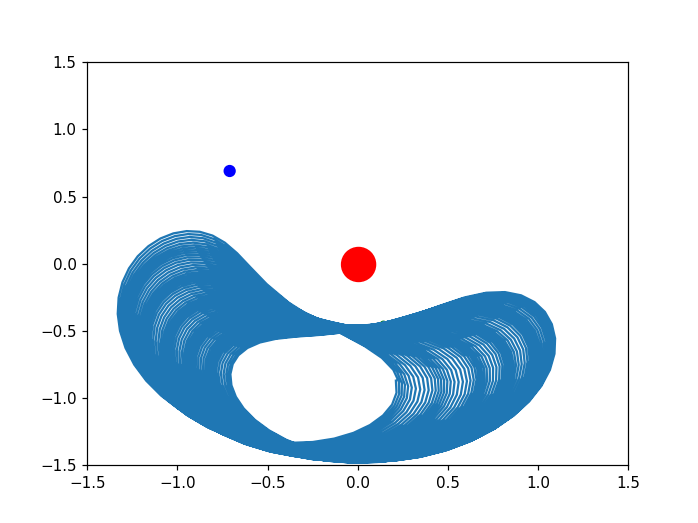

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)


x_pos = [earth_pos[0,0],sun_pos[0,0],cruithne_pos[0,0]]
y_pos = [earth_pos[0,1],sun_pos[0,1],cruithne_pos[0,1]]
line_x = []
line_y = []
scat = ax.scatter(x_pos,  \
                  y_pos,   \
                  c=['b','r','g'], marker="o", s=[50,500,20])
line, = ax.plot(line_x,line_y)

def update(frame):
    
    x_pos = [earth_pos[frame,0],sun_pos[frame,0],cruithne_pos[frame,0]]
    y_pos = [earth_pos[frame,1],sun_pos[frame,1],cruithne_pos[frame,1]]
    scat.set_offsets(np.c_[x_pos,y_pos])
    
    line_x.append(cruithne_pos[frame,0])
    line_y.append(cruithne_pos[frame,1])
    line.set_data(line_x,line_y)
    return scat, line,


ani = animation.FuncAnimation(fig, update, blit=True,interval=10)
plt.show()

<IPython.core.display.Javascript object>


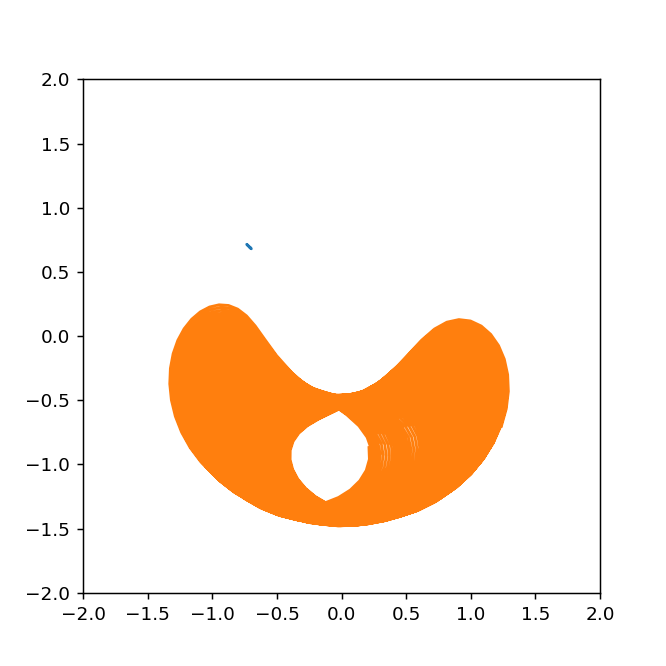

In [156]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(earth_pos[:,0],earth_pos[:,1]);
plt.plot(cruithne_pos[:,0],cruithne_pos[:,1]);